<a href="https://colab.research.google.com/github/bchuchucaa/RNNConsumoDeAgua/blob/main/RNNConsumoDeAgua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/archive.zip

unzip:  cannot find or open /content/archive.zip, /content/archive.zip.zip or /content/archive.zip.ZIP.


In [ ]:
from pandas import read_csv
from datetime import datetime
import pandas as pd
from matplotlib import pyplot
import numpy as np
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
print('LIBRERIAS IMPORTADAS')

LIBRERIAS IMPORTADAS


**LECTURA DE DATOS**

In [135]:
#LOADING DATA 
df= read_csv('/content/AguaH.csv')
df = df.iloc[0:1000 , :]
#AJUSTE DEL FORMATO DE LAS FECHAS PARA LA TRANSFORMACION A TIPO DATETIME
lookup = {'ENE':'01','FEB':'02','MAR':'03','ABR':'04','MAY':'05','JUN':'06','JUL':'07','AGO':'08','SEP':'09','OCT':'10','NOV':'11','DIC':'12'}
clist=[]
for col in df.columns[5:]:
    col = col[4:].split('_')
    clist.append('20'+col[1]+'-'+lookup[col[0]]+'-01')

columns = ['LANDUSE_TYPE','USER','PIPE DIAM','VENDOR','JAN16']+clist
df.columns=columns
df = df.drop(columns=['LANDUSE_TYPE','USER','PIPE DIAM','VENDOR','JAN16'])
df=df.transpose()
print("Dataframe shape ",df.shape)


Dataframe shape  (84, 1000)


In [ ]:
#ESTE CODIGO SIRVE UNICAMENTE PARA LA INTEGRACION DE LOS NOMBRES EN EL DATAFRAME
col_list = ["Name"]
names = pd.read_csv("/content/StateNames.csv", usecols=col_list)
names = names.iloc[0:84 , :]
#ELIMINAMOS LA COLUMNA DE LOS NOMBRE YA QUE SE BINARIZARON
#df = df.iloc[: , 1:]
print("Names shape ",names.shape)

In [120]:
df.insert(loc=0, column='Names', value=names)


In [121]:
df.shape

(84, 101)

In [124]:
df.head(30)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
2009-01-01,20.0,NaN,NaN,NaN,20.0,20.0,20.0,30.0,20.0,19.0,NaN,NaN,9.0,NaN,NaN,14.0,20.0,20.0,20.0,NaN,NaN,0.0,25.0,14.0,NaN,20.0,14.0,NaN,18.0,14.0,25.0,20.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,20.0,NaN,NaN,20.0,25.0,NaN,14.0,NaN,15.0,6.0,NaN,20.0,NaN,20.0,20.0,14.0,NaN,NaN,NaN,15.0,41.0,20.0,11.0,14.0,25.0,NaN,NaN,20.0,27.0,20.0,20.0,18.0,NaN,1.0,NaN,18.0,NaN
2009-02-01,20.0,30.0,NaN,NaN,20.0,20.0,20.0,10.0,20.0,21.0,NaN,NaN,12.0,NaN,NaN,14.0,20.0,20.0,20.0,NaN,30.0,0.0,25.0,14.0,NaN,20.0,14.0,NaN,18.0,14.0,25.0,20.0,20.0,NaN,NaN,NaN,NaN,NaN,20.0,NaN,...,NaN,NaN,NaN,20.0,NaN,20.0,20.0,25.0,NaN,14.0,NaN,15.0,5.0,NaN,20.0,NaN,20.0,20.0,14.0,NaN,NaN,NaN,15.0,42.0,20.0,9.0,14.0,25.0,NaN,NaN,20.0,24.0,20.0,20.0,19.0,NaN,0.0,NaN,13.0,NaN
2009-03-01,20.0,30.0,NaN,NaN,20.0,20.0,20.0,30.0,20.0,21.0,NaN,NaN,13.0,NaN,NaN,14.0,20.0,20.0,20.0,NaN,30.0,0.0,25.0,14.0,NaN,20.0,14.0,NaN,18.0,14.0,25.0,20.0,20.0,NaN,NaN,NaN,NaN,NaN,20.0,30.0,...,NaN,NaN,NaN,20.0,NaN,20.0,20.0,22.0,NaN,2.0,NaN,15.0,6.0,NaN,20.0,NaN,20.0,20.0,14.0,NaN,NaN,NaN,13.0,35.0,20.0,10.0,14.0,25.0,NaN,NaN,20.0,17.0,20.0,20.0,15.0,NaN,1.0,NaN,14.0,NaN
2009-04-01,20.0,30.0,NaN,NaN,20.0,20.0,20.0,20.0,20.0,22.0,NaN,NaN,13.0,NaN,NaN,14.0,20.0,20.0,20.0,NaN,30.0,0.0,25.0,14.0,NaN,6.0,14.0,NaN,18.0,14.0,25.0,20.0,20.0,NaN,NaN,NaN,NaN,NaN,20.0,30.0,...,NaN,NaN,NaN,20.0,NaN,20.0,20.0,21.0,NaN,0.0,NaN,15.0,6.0,NaN,20.0,NaN,8.0,20.0,14.0,NaN,NaN,NaN,14.0,40.0,20.0,10.0,14.0,25.0,NaN,NaN,20.0,12.0,6.0,13.0,15.0,NaN,0.0,NaN,18.0,NaN
2009-05-01,20.0,30.0,NaN,NaN,20.0,20.0,20.0,30.0,20.0,26.0,NaN,NaN,22.0,NaN,NaN,14.0,20.0,20.0,20.0,NaN,30.0,0.0,25.0,14.0,20.0,14.0,14.0,NaN,18.0,14.0,25.0,20.0,20.0,NaN,NaN,NaN,NaN,NaN,20.0,30.0,...,NaN,NaN,NaN,20.0,NaN,20.0,20.0,29.0,NaN,0.0,NaN,15.0,8.0,NaN,20.0,NaN,9.0,20.0,14.0,NaN,NaN,NaN,15.0,39.0,15.0,0.0,14.0,25.0,NaN,NaN,20.0,17.0,11.0,22.0,20.0,NaN,1.0,NaN,15.0,NaN
2009-06-01,20.0,30.0,NaN,NaN,20.0,20.0,20.0,30.0,20.0,20.0,NaN,NaN,21.0,NaN,NaN,14.0,20.0,20.0,20.0,NaN,30.0,0.0,25.0,14.0,20.0,10.0,14.0,NaN,18.0,14.0,25.0,20.0,20.0,NaN,NaN,NaN,NaN,NaN,20.0,10.0,...,NaN,NaN,NaN,20.0,NaN,20.0,20.0,27.0,NaN,4.0,NaN,15.0,7.0,NaN,20.0,NaN,14.0,20.0,14.0,NaN,NaN,NaN,15.0,38.0,17.0,0.0,14.0,25.0,NaN,NaN,20.0,10.0,12.0,23.0,30.0,20.0,0.0,NaN,22.0,NaN
2009-07-01,20.0,30.0,NaN,NaN,20.0,20.0,20.0,30.0,20.0,23.0,NaN,NaN,19.0,NaN,NaN,14.0,20.0,20.0,20.0,NaN,30.0,0.0,25.0,14.0,9.0,14.0,40.0,NaN,18.0,14.0,25.0,20.0,20.0,NaN,20.0,NaN,NaN,NaN,20.0,10.0,...,NaN,NaN,NaN,20.0,NaN,20.0,20.0,23.0,NaN,5.0,NaN,15.0,11.0,NaN,20.0,NaN,21.0,20.0,14.0,NaN,NaN,NaN,17.0,38.0,32.0,0.0,14.0,25.0,NaN,NaN,20.0,25.0,16.0,40.0,35.0,20.0,0.0,NaN,16.0,NaN
2009-08-01,20.0,30.0,NaN,NaN,20.0,17.0,20.0,30.0,20.0,21.0,NaN,NaN,20.0,NaN,NaN,14.0,20.0,20.0,20.0,NaN,30.0,0.0,25.0,14.0,21.0,7.0,88.0,NaN,18.0,14.0,25.0,20.0,20.0,NaN,20.0,NaN,NaN,NaN,20.0,10.0,...,NaN,NaN,NaN,20.0,NaN,20.0,20.0,38.0,NaN,4.0,NaN,15.0,11.0,NaN,20.0,NaN,17.0,20.0,14.0,NaN,NaN,NaN,20.0,37.0,27.0,0.0,14.0,25.0,NaN,NaN,20.0,34.0,20.0,20.0,27.0,20.0,1.0,NaN,16.0,NaN
2009-09-01,20.0,30.0,NaN,NaN,20.0,14.0,20.0,30.0,20.0,18.0,NaN,NaN,22.0,NaN,NaN,14.0,20.0,20.0,7.0,NaN,30.0,0.0,25.0,14.0,23.0,12.0,16.0,NaN,18.0,14.0,25.0,20.0,20.0,NaN,20.0,NaN,NaN,NaN,20.0,10.0,...,NaN,NaN,NaN,20.0,NaN,20.0,20.0,30.0,NaN,2.0,NaN,15.0,7.0,NaN,20.0,NaN,12.0,20.0,14.0,NaN,NaN,NaN,17.0,37.0,21.0,3.0,14.0,25.0,NaN,NaN,20.0,17.0,19.0,21.0,20.0,20.0,0.0,NaN,16.0,NaN
2009-10-01,20.0,30.0,NaN,NaN,20.0,10.0,20.0,30.0,20.0,10.0,NaN,NaN,18.0,NaN,NaN,14.0,20.0,20.0,3.0,NaN,30.0,0.0,25.0,14.0,19.0,8.0,30.0,NaN,18.0,14.0,25.0,20.0,20.0,NaN,20.0,NaN,NaN,NaN,20.0,10.0,...,NaN,NaN,NaN,20.0,NaN,20.0,20.0,25.0,NaN,0.0,NaN,15.0,12.0,NaN,20.0,NaN,9.0,20.0,14.0,NaN,NaN,NaN,18.0,37.0,9.0,2.0,14.0,25.0,NaN,NaN,20.0,1.

In [113]:
encoded=pd.get_dummies(df.iloc[])

In [88]:
df=pd.concat([df,encoded], axis=1)

In [142]:
df.to_csv("waterconsumption.csv")

In [136]:

#RELLENANDO VALORES NAN POR LA MEDIA
df=df.fillna(20)
df.index.name = 'date'
#CONVIRTIENDO EL INDICE DEL DATAFRAME EN TIPO DATETIME
df.index = pd.to_datetime(df.index)
type(df.index)


pandas.core.indexes.datetimes.DatetimeIndex

In [126]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-01-01,20.0,20.0,20.0,20.0,20.0,20.0,20.0,30.0,20.0,19.0,20.0,20.0,9.0,20.0,20.0,14.0,20.0,20.0,20.0,20.0,20.0,0.0,25.0,14.0,20.0,20.0,14.0,20.0,18.0,14.0,25.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,25.0,20.0,14.0,20.0,15.0,6.0,20.0,20.0,20.0,20.0,20.0,14.0,20.0,20.0,20.0,15.0,41.0,20.0,11.0,14.0,25.0,20.0,20.0,20.0,27.0,20.0,20.0,18.0,20.0,1.0,20.0,18.0,20.0
2009-02-01,20.0,30.0,20.0,20.0,20.0,20.0,20.0,10.0,20.0,21.0,20.0,20.0,12.0,20.0,20.0,14.0,20.0,20.0,20.0,20.0,30.0,0.0,25.0,14.0,20.0,20.0,14.0,20.0,18.0,14.0,25.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,25.0,20.0,14.0,20.0,15.0,5.0,20.0,20.0,20.0,20.0,20.0,14.0,20.0,20.0,20.0,15.0,42.0,20.0,9.0,14.0,25.0,20.0,20.0,20.0,24.0,20.0,20.0,19.0,20.0,0.0,20.0,13.0,20.0
2009-03-01,20.0,30.0,20.0,20.0,20.0,20.0,20.0,30.0,20.0,21.0,20.0,20.0,13.0,20.0,20.0,14.0,20.0,20.0,20.0,20.0,30.0,0.0,25.0,14.0,20.0,20.0,14.0,20.0,18.0,14.0,25.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,30.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,22.0,20.0,2.0,20.0,15.0,6.0,20.0,20.0,20.0,20.0,20.0,14.0,20.0,20.0,20.0,13.0,35.0,20.0,10.0,14.0,25.0,20.0,20.0,20.0,17.0,20.0,20.0,15.0,20.0,1.0,20.0,14.0,20.0
2009-04-01,20.0,30.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,22.0,20.0,20.0,13.0,20.0,20.0,14.0,20.0,20.0,20.0,20.0,30.0,0.0,25.0,14.0,20.0,6.0,14.0,20.0,18.0,14.0,25.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,30.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,21.0,20.0,0.0,20.0,15.0,6.0,20.0,20.0,20.0,8.0,20.0,14.0,20.0,20.0,20.0,14.0,40.0,20.0,10.0,14.0,25.0,20.0,20.0,20.0,12.0,6.0,13.0,15.0,20.0,0.0,20.0,18.0,20.0
2009-05-01,20.0,30.0,20.0,20.0,20.0,20.0,20.0,30.0,20.0,26.0,20.0,20.0,22.0,20.0,20.0,14.0,20.0,20.0,20.0,20.0,30.0,0.0,25.0,14.0,20.0,14.0,14.0,20.0,18.0,14.0,25.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,30.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,29.0,20.0,0.0,20.0,15.0,8.0,20.0,20.0,20.0,9.0,20.0,14.0,20.0,20.0,20.0,15.0,39.0,15.0,0.0,14.0,25.0,20.0,20.0,20.0,17.0,11.0,22.0,20.0,20.0,1.0,20.0,15.0,20.0


In [137]:
y=df.iloc[: , -1]
dataset=df.iloc[:, :-1]
x=dataset
values = dataset.values
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-01-01,20.0,20.0,20.0,20.0,20.0,20.0,20.0,30.0,20.0,19.0,20.0,20.0,9.0,20.0,20.0,14.0,20.0,20.0,20.0,20.0,20.0,0.0,25.0,14.0,20.0,20.0,14.0,20.0,18.0,14.0,25.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,15.0,10.0,20.0,15.0,22.0,0.0,10.0,15.0,15.0,20.0,14.0,20.0,18.0,17.0,20.0,0.0,20.0,28.0,20.0,20.0,18.0,0.0,18.0,20.0,13.0,16.0,20.0,14.0,65.0,15.0,65.0,1.0,19.0,20.0,20.0,21.0,24.0,20.0,20.0,25.0
2009-02-01,20.0,30.0,20.0,20.0,20.0,20.0,20.0,10.0,20.0,21.0,20.0,20.0,12.0,20.0,20.0,14.0,20.0,20.0,20.0,20.0,30.0,0.0,25.0,14.0,20.0,20.0,14.0,20.0,18.0,14.0,25.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,15.0,10.0,20.0,15.0,22.0,32.0,15.0,15.0,15.0,20.0,12.0,20.0,22.0,15.0,20.0,0.0,20.0,26.0,10.0,30.0,18.0,0.0,18.0,20.0,17.0,16.0,20.0,26.0,65.0,15.0,67.0,2.0,24.0,20.0,20.0,21.0,24.0,20.0,20.0,25.0
2009-03-01,20.0,30.0,20.0,20.0,20.0,20.0,20.0,30.0,20.0,21.0,20.0,20.0,13.0,20.0,20.0,14.0,20.0,20.0,20.0,20.0,30.0,0.0,25.0,14.0,20.0,20.0,14.0,20.0,18.0,14.0,25.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,30.0,...,15.0,25.0,20.0,15.0,22.0,24.0,15.0,15.0,15.0,20.0,11.0,20.0,16.0,9.0,20.0,0.0,20.0,21.0,10.0,30.0,18.0,0.0,18.0,20.0,34.0,15.0,20.0,22.0,65.0,15.0,0.0,0.0,18.0,20.0,20.0,21.0,24.0,20.0,20.0,25.0
2009-04-01,20.0,30.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,22.0,20.0,20.0,13.0,20.0,20.0,14.0,20.0,20.0,20.0,20.0,30.0,0.0,25.0,14.0,20.0,6.0,14.0,20.0,18.0,14.0,25.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,30.0,...,15.0,25.0,20.0,15.0,22.0,26.0,10.0,15.0,15.0,20.0,15.0,20.0,37.0,11.0,20.0,0.0,20.0,23.0,10.0,30.0,18.0,0.0,18.0,20.0,39.0,15.0,15.0,21.0,65.0,15.0,0.0,0.0,19.0,20.0,20.0,21.0,24.0,20.0,20.0,25.0
2009-05-01,20.0,30.0,20.0,20.0,20.0,20.0,20.0,30.0,20.0,26.0,20.0,20.0,22.0,20.0,20.0,14.0,20.0,20.0,20.0,20.0,30.0,0.0,25.0,14.0,20.0,14.0,14.0,20.0,18.0,14.0,25.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,30.0,...,15.0,25.0,20.0,15.0,22.0,21.0,10.0,15.0,15.0,20.0,14.0,20.0,29.0,11.0,20.0,25.0,20.0,23.0,10.0,30.0,18.0,0.0,18.0,20.0,37.0,15.0,8.0,13.0,65.0,15.0,0.0,11.0,19.0,20.0,20.0,21.0,24.0,10.0,20.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-01,7.0,16.0,10.0,18.0,31.0,19.0,17.0,22.0,7.0,3.0,15.0,15.0,39.0,23.0,15.0,5.0,1.0,24.0,14.0,2.0,20.0,25.0,14.0,8.0,21.0,1.0,9.0,5.0,1.0,1.0,20.0,14.0,14.0,5.0,9.0,27.0,15.0,15.0,46.0,19.0,...,21.0,10.0,17.0,11.0,23.0,20.0,2.0,14.0,24.0,14.0,11.0,0.0,17.0,15.0,3.0,13.0,0.0,14.0,7.0,20.0,23.0,27.0,23.0,20.0,47.0,20.0,20.0,10.0,41.0,2.0,26.0,0.0,22.0,9.0,0.0,21.0,5.0,7.0,15.0,0.0
2015-09-01,42.0,13.0,12.0,17.0,27.0,19.0,17.0,27.0,16.0,3.0,15.0,15.0,52.0,22.0,15.0,5.0,1.0,24.0,6.0,2.0,20.0,25.0,13.0,8.0,21.0,2.0,9.0,5.0,1.0,5.0,20.0,14.0,13.0,4.0,9.0,27.0,15.0,15.0,50.0,18.0,...,22.0,10.0,2.0,11.0,20.0,20.0,0.0,14.0,24.0,18.0,14.0,2.0,14.0,15.0,3.0,0.0,33.0,21.0,5.0,30.0,23.0,25.0,23.0,20.0,26.0,20.0,8.0,10.0,24.0,2.0,28.0,0.0,21.0,8.0,0.0,30.0,5.0,6.0,0.0,23.0
2015-10-01,27.0,17.0,9.0,17.0,27.0,18.0,17.0,26.0,7.0,3.0,15.0,15.0,33.0,12.0,15.0,5.0,1.0,24.0,6.0,2.0,19.0,25.0,6.0,7.0,16.0,2.0,9.0,5.0,1.0,4.0,20.0,14.0,10.0,4.0,9.0,39.0,15.0,15.0,46.0,18.0,...,22.0,10.0,2.0,12.0,24.0,20.0,0.0,14.0,24.0,10.0,16.0,0.0,12.0,15.0,3.0,0.0,38.0,17.0,7.0,30.0,23.0,29.0,23.0,20.0,28.0,20.0,10.0,10.0,41.0,2.0,39.0,0.0,18.0,8.0,11.0,29.0,5.0,3.0,15.0,6.0


Grafica del consumo de agua de un usuario

In [138]:
# asegurarse que todo esta en formato float
values = values.astype('float32')
# normalzación
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
scaled

array([[0.47619048, 0.6666667 , 1.        , ..., 0.79999995, 0.48780486,
        0.75757575],
       [0.47619048, 1.        , 1.        , ..., 0.79999995, 0.48780486,
        0.75757575],
       [0.47619048, 1.        , 1.        , ..., 0.79999995, 0.48780486,
        0.75757575],
       ...,
       [0.64285713, 0.5666667 , 0.35294122, ..., 0.12      , 0.36585364,
        0.18181819],
       [0.52380955, 0.5666667 , 0.1764706 , ..., 0.32      , 0.3902439 ,
        0.12121212],
       [0.5       , 0.36666667, 0.        , ..., 0.28      , 0.3902439 ,
        0.12121212]], dtype=float32)

In [139]:
#red neuronal estandar
#X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=.2)

numregistros=scaled.shape[0]
print(numregistros)

# split en conjuntos de train y test
n_train = int(round(numregistros*0.8,0)) #80% para entrenamiento
train_X = scaled[:n_train, :]
test_X = scaled[n_train:, :]
train_y = y[:n_train]
test_y = y[n_train:]

# reshape entrada a 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

84
(67, 1, 999) (67,) (17, 1, 999) (17,)


Epoch 1/1000
1/1 - 3s - loss: 16.5352 - val_loss: 26.1011 - 3s/epoch - 3s/step
Epoch 2/1000
1/1 - 0s - loss: 15.8535 - val_loss: 25.4492 - 25ms/epoch - 25ms/step
Epoch 3/1000
1/1 - 0s - loss: 15.1777 - val_loss: 24.8501 - 23ms/epoch - 23ms/step
Epoch 4/1000
1/1 - 0s - loss: 14.5986 - val_loss: 24.3415 - 24ms/epoch - 24ms/step
Epoch 5/1000
1/1 - 0s - loss: 14.1269 - val_loss: 23.9322 - 26ms/epoch - 26ms/step
Epoch 6/1000
1/1 - 0s - loss: 13.7543 - val_loss: 23.6131 - 27ms/epoch - 27ms/step
Epoch 7/1000
1/1 - 0s - loss: 13.4688 - val_loss: 23.3682 - 23ms/epoch - 23ms/step
Epoch 8/1000
1/1 - 0s - loss: 13.2545 - val_loss: 23.1804 - 23ms/epoch - 23ms/step
Epoch 9/1000
1/1 - 0s - loss: 13.0936 - val_loss: 23.0342 - 29ms/epoch - 29ms/step
Epoch 10/1000
1/1 - 0s - loss: 12.9702 - val_loss: 22.9171 - 29ms/epoch - 29ms/step
Epoch 11/1000
1/1 - 0s - loss: 12.8719 - val_loss: 22.8197 - 31ms/epoch - 31ms/step
Epoch 12/1000
1/1 - 0s - loss: 12.7894 - val_loss: 22.7351 - 26ms/epoch - 26ms/step
Epoch

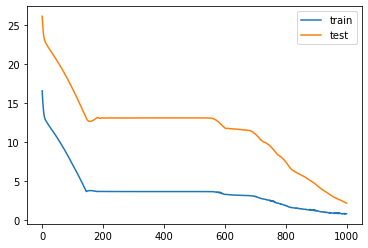

In [140]:
# Diseño de la red recurrente LSTM
model = Sequential()
model.add(LSTM(12, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(9))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# entrenar red
history = model.fit(train_X, train_y, epochs=1000, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
input

In [157]:
#FUNCION PARA ESCOGER UN REGISTRO DENTRO DEL DATAFRAME PARA LAS PRUEBAS DE VALIDACION
def selectRabbit(user):
  xnew = df.iloc[user:user+1 , 0:999]
  return xnew


In [161]:
#FUNCION PARA BUSCAR EL VALOR REAL DE CONSUMO DENTRO DEL DATAFRAME
def searchForReal(user):
  real=xnew = df.iloc[user:user+1 ,-1]
  return real

In [162]:
def prediccion(user):
    #Xnew = np.array([[]])#real es 12
    #Xnew = np.array([[-13,2.0,1020.0,3.58,0,0]])#real es 79
    xnew=selectRabbit(user)
    Xnew= scaler.transform(xnew)
    Xnew = Xnew.reshape((Xnew.shape[0], 1, Xnew.shape[1]))
    pred= model.predict(Xnew)[0]
    return pred
pred=prediccion(2)
print('PREDICCION DE CONSUMO: ',pred)
print('CONSUMO REAL ',searchForReal(2))

PREDICCION DE CONSUMO:  [13.998351]
CONSUMO REAL  date
2009-03-01    14.0
Name: 999, dtype: float64
